In [1]:
from tensorflow.keras.models import load_model
model = load_model("my_model.h5")

In [2]:
import numpy as np
from tensorflow.keras.datasets import cifar10  # Replace with your Kaggle dataset if using another
from sklearn.model_selection import train_test_split


In [3]:
# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the dataset (if needed)
X_test = X_test.astype('float32') / 255.0

# Confirm shapes
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [4]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the test labels (Replace 10 with the actual number of classes)
y_test = to_categorical(y_test, num_classes=10)  

# Evaluate the model and get the accuracy
_, test_acc = model.evaluate(X_test, y_test)

print('Test Accuracy:', test_acc)


313/313 [==============================] - 25s 78ms/step - loss: 2.6821 - accuracy: 0.3459
Test Accuracy: 0.3458999991416931


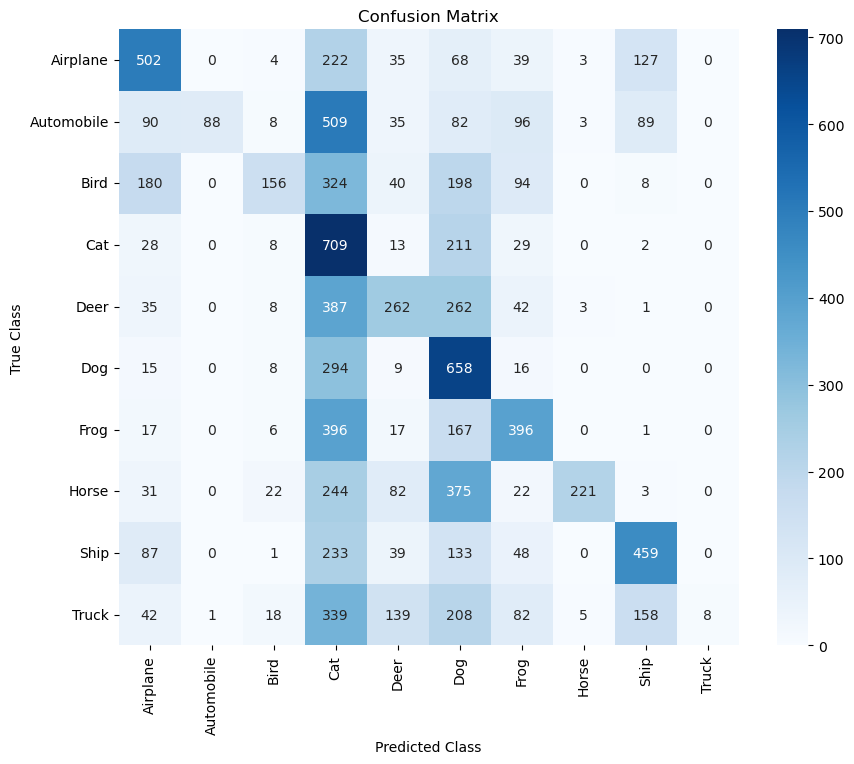


Classification Report:
              precision    recall  f1-score   support

    Airplane       0.49      0.50      0.50      1000
  Automobile       0.99      0.09      0.16      1000
        Bird       0.65      0.16      0.25      1000
         Cat       0.19      0.71      0.30      1000
        Deer       0.39      0.26      0.31      1000
         Dog       0.28      0.66      0.39      1000
        Frog       0.46      0.40      0.42      1000
       Horse       0.94      0.22      0.36      1000
        Ship       0.54      0.46      0.50      1000
       Truck       1.00      0.01      0.02      1000

    accuracy                           0.35     10000
   macro avg       0.59      0.35      0.32     10000
weighted avg       0.59      0.35      0.32     10000



In [5]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting probabilities for all 10 classes
test_predictions = model.predict(X_test)  # Outputs probabilities for all classes

# Convert probabilities to predicted class indices
predicted_classes = np.argmax(test_predictions, axis=1)  # Index of the highest probability

# Ensure y_test contains true class indices (0-9)
# If y_test is one-hot encoded, convert it to class indices:
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Plot the confusion matrix
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes, target_names=class_names))


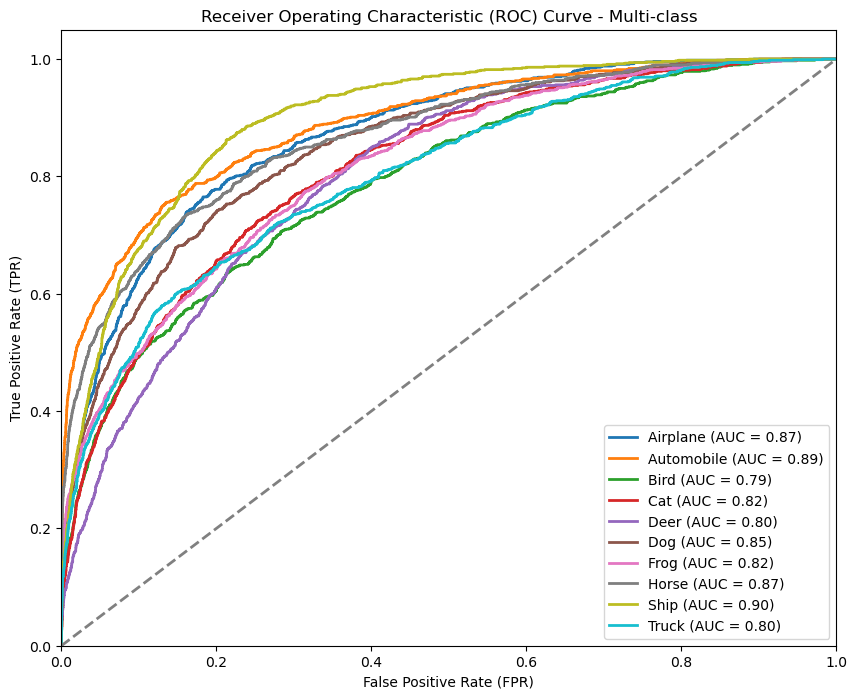

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

# List of class names
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer", 
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# One-hot encode y_test if it is not one-hot encoded already
encoder = OneHotEncoder(sparse=False)
y_test_one_hot = encoder.fit_transform(y_test.reshape(-1, 1))

# Get the predicted probabilities for each class
y_pred = model.predict(X_test)

# Number of classes
n_classes = y_test_one_hot.shape[1]

# Initialize dictionaries to store fpr, tpr, and roc_auc for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the random classifier diagonal line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-class')
plt.legend(loc='lower right')
plt.show()


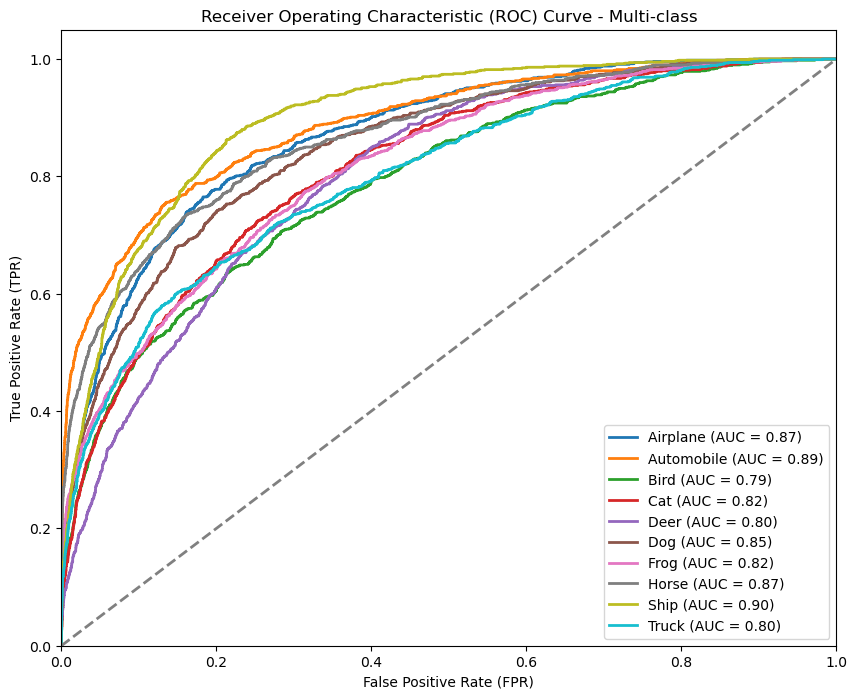

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

# List of class names
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer", 
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# One-hot encode y_test if it is not one-hot encoded already
encoder = OneHotEncoder(sparse=False)
y_test_one_hot = encoder.fit_transform(y_test.reshape(-1, 1))

# Get the predicted probabilities for each class
y_pred = model.predict(X_test)

# Number of classes
n_classes = y_test_one_hot.shape[1]

# Initialize dictionaries to store fpr, tpr, and roc_auc for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the random classifier diagonal line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-class')
plt.legend(loc='lower right')
plt.show()


Predicted Class: Airplane
Class Probabilities: [[9.1887212e-01 6.8695750e-05 1.4363471e-03 7.2646076e-03 4.6098203e-04
  1.6474225e-04 3.0534394e-04 2.5883087e-04 1.4496495e-03 6.9718748e-02]]


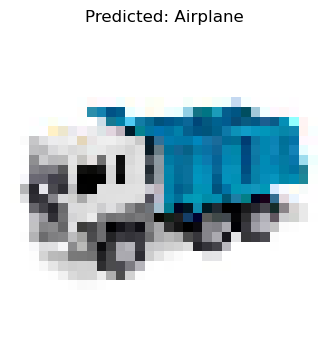

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and preprocess the image
img_path = 'truck5.jpeg'
img = load_img(img_path, target_size=(32, 32))  # Resize to match model's input
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image if required by your model

# Predict the class probabilities
predictions = model.predict(img_array)

# Define class names (update with your actual class labels)
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", 
    "Dog", "Frog", "Horse", "Ship", "Truck"]  
if len(predictions[0]) != len(class_names):
    raise ValueError("Number of class names does not match the number of output predictions.")

# Get the predicted class
predicted_class = class_names[np.argmax(predictions)]

# Display the results
print(f"Predicted Class: {predicted_class}")
print(f"Class Probabilities: {predictions}")

# Plot the image with the prediction
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class}")
plt.show()
